In [1]:
import os
os.chdir("..")

In [2]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from echopop import Survey
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import AutoLocator, LogFormatterSciNotation, LogLocator,  ScalarFormatter
import geopandas as gpd
import pandas as pd
from typing import Any, Dict, Optional, Tuple, Union
import numpy as np
import echopop.graphics.plotting as egp

In [3]:
init_config = "C:/Users/Brandyn/Documents/GitHub/echopop/config_files/initialization_config.yml"
file_config = "C:/Users/Brandyn/Documents/GitHub/echopop/config_files/survey_year_2019_config.yml"
survey = Survey(init_config, file_config)
survey.load_survey_data()
survey.load_acoustic_data()
survey.transect_analysis()
survey.fit_variogram()
survey.kriging_analysis(variogram_parameters={"n_lags": 30}, variable="biomass_density")
transect_data = survey.analysis["transect"]["acoustics"]["adult_transect_df"].copy()
mesh_data = survey.results["kriging"]["mesh_results_df"].copy()
geo_config = survey.config["geospatial"]
egp.get_coastline(geo_config)

--------------------------------
TRANSECT RESULTS
--------------------------------
| Variable: Biomass (kmt)
| Age-1 fish excluded: True
| Stratum definition: KS
--------------------------------
GENERAL RESULTS
--------------------------------
| Total biomass: 1651.1 kmt
    Age-1: 7.9 kmt
    Age-2+: 1643.2 kmt
| Total female biomass: 832.2 kmt
    Age-1: 4.0 kmt
    Age-2+: 828.2 kmt
| Total male biomass: 818.5 kmt
    Age-1: 3.9 kmt
    Age-2+: 814.6 kmt
| Total unsexed biomass: 0.4 kmt
| Total mixed biomass: 36.8 kmt
--------------------------------
Longitude and latitude coordinates (WGS84) converted to standardized coordinates (x and y).
-----------------------------
VARIOGRAM OPTIMIZATION
-----------------------------
| See `self.analysis['settings']['variogram']['optimization'] for parameter settings.
-----------------------------
| Variogram model: ['bessel', 'exponential'] (composite family)
-----------------------------
| Initial fit -> Optimized fit
------------------------

UnboundLocalError: cannot access local variable 'label' where it is not associated with a value

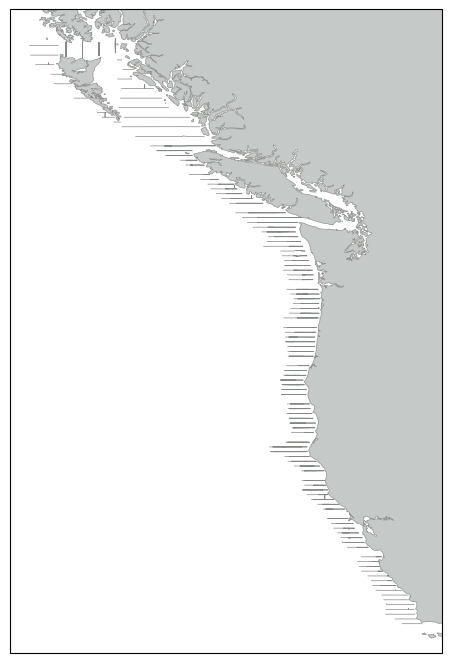

In [18]:
egp.plot_transect(transect_data, 
                  variable="biomass_density", 
                  figure_width=6.0, 
                  geo_config=geo_config, 
                  data_range=(1e1, 7e5))

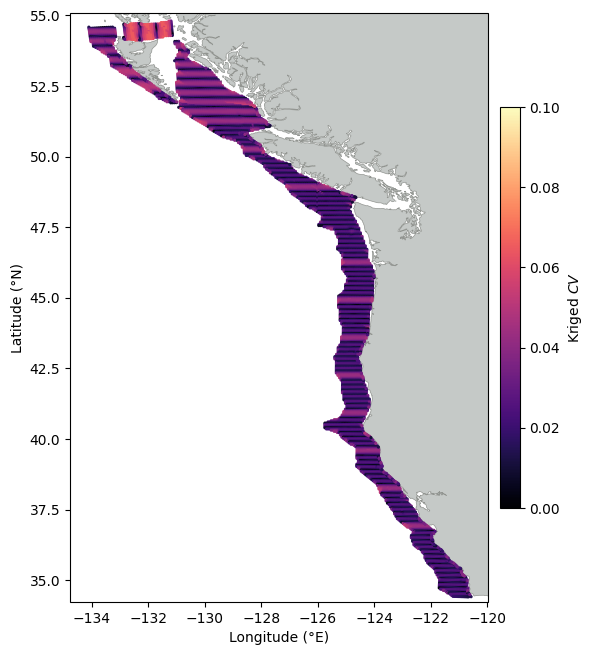

In [21]:
egp.plot_mesh(mesh_data, 
              variable="sample_cv", 
              figure_width=6.0, 
              geo_config=geo_config)